## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Ли Алиса И.|
|---------|-----------|
| Группа  | 308б-18   |



In [1]:
import torch
from torchvision import datasets, transforms 
from tqdm import tqdm_notebook
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:


# trainset = torch.datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)
# dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_m, dtype=torch.float32),torch.tensor(y_train_m,dtype=torch.int64)# dataloader = torch.utils.data.DataLoader(dataset,batch_size=10)
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)

test_loader.dataset.test_data.size()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([10000, 28, 28])

In [15]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = torch.nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = torch.nn.functional.softmax(x)
        return x
    


In [16]:
net = Net()

loss_func = torch.nn.CrossEntropyLoss()

lr = 0.001
optim = torch.optim.Adam(net.parameters(), lr = lr)

for epoch in tqdm_notebook(range(2)):

    train_dataiter = iter(train_loader)
    for i, batch in enumerate(tqdm_notebook(train_dataiter)):
      X_batch, y_batch = batch
      optim.zero_grad()
      y_pred = net(X_batch)
      loss = loss_func(y_pred, y_batch)
      loss.backward()
      optim.step()
      
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [17]:
from sklearn.metrics import accuracy_score

test_dataiter = iter(test_loader)
images, labels = test_dataiter.next()
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0.9223

Как видим даже простая однослойная сеть выдает точность 92%, что очень хорошо. Добавим слой и эпох и проверим на датасете CIFAR10

In [3]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)

train_loader.dataset.data.shape

(50000, 32, 32, 3)

In [5]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = torch.nn.Linear(32*32*3, 256)
        self.fc2 = torch.nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.nn.functional.relu(self.fc1(x))

        x = torch.nn.functional.softmax(self.fc2(x))
        return x

In [6]:
net = Net()

loss_func = torch.nn.CrossEntropyLoss()

lr = 0.001
optim = torch.optim.Adam(net.parameters(), lr = lr)

for epoch in tqdm_notebook(range(5)):

    train_dataiter = iter(train_loader)
    for i, batch in enumerate(tqdm_notebook(train_dataiter)):
      X_batch, y_batch = batch
      optim.zero_grad()
      y_pred = net(X_batch)
      loss = loss_func(y_pred, y_batch)
      loss.backward()
      optim.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


In [13]:
from sklearn.metrics import accuracy_score

test_dataiter = iter(test_loader)
images, labels = test_dataiter.next()
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.3512

Точность 35% крайне посредственна. Добавим еще промежуточный слой и увеличим количество эпох.

In [4]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)

In [5]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = torch.nn.Linear(32*32*3, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.tanh(self.fc2(x))
        x = torch.nn.functional.softmax(self.fc3(x))
        return x

In [6]:
net = Net()

loss_func = torch.nn.CrossEntropyLoss()

lr = 0.001
optim = torch.optim.Adam(net.parameters(), lr = lr)

for epoch in tqdm_notebook(range(15)):

    train_dataiter = iter(train_loader)
    for i, batch in enumerate(tqdm_notebook(train_dataiter)):
      X_batch, y_batch = batch
      optim.zero_grad()
      y_pred = net(X_batch)
      loss = loss_func(y_pred, y_batch)
      loss.backward()
      optim.step()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [7]:
from sklearn.metrics import accuracy_score

test_dataiter = iter(test_loader)
images, labels = test_dataiter.next()
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.4099

Как видим даже 3 слойная сеть не дает на данном датасете высокий результат. Проверим наш персептрон на датасете fasionmnist и выведем графики точности тестовой и тренировочной выборки.

In [9]:
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)

class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = torch.nn.Linear(28*28, 256)
        self.fc2 = torch.nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.softmax(self.fc2(x))
        return x

In [7]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


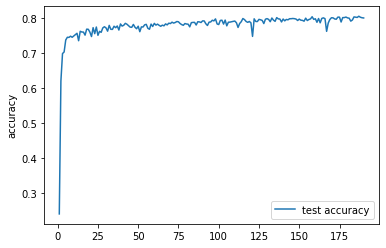

0.7998

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

fig, ax = plt.subplots(1, 1)


x_plot_test = []
y_plot_test = []
ax.set_ylabel('accuracy')
count = 0


net = Net()

loss_func = torch.nn.CrossEntropyLoss()

lr = 0.001
optim = torch.optim.Adam(net.parameters(), lr = lr)

for epoch in tqdm_notebook(range(5)):

    train_dataiter = iter(train_loader)
    for i, batch in enumerate(tqdm_notebook(train_dataiter)):
      X_batch, y_batch = batch
      optim.zero_grad()
      y_pred = net(X_batch)
      loss = loss_func(y_pred, y_batch)
      loss.backward()
      optim.step()
      if i % 50 == 0:
        count += 1
        x_plot_test.append(count)
        test_dataiter = iter(test_loader)
        images, labels = test_dataiter.next()
        acc_test = accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1))
        y_plot_test.append(acc_test)


plt.plot(x_plot_test, y_plot_test, label='test accuracy')
plt.legend()
plt.show()
test_dataiter = iter(test_loader)
images, labels = test_dataiter.next()
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis=1))


Как видно по графику почти сразу точность повысилась до 70%, однако дальше она дошла до 80 и больше не росла